In [0]:
import pandas as pd
import numpy as np
import pickle
import gzip


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
with open('/content/drive/My Drive/dl-ims/test_subjects','rb') as f:
               images = pickle.load(f)


#### Subject IDs

In [42]:
im_name_list =[]

for x1 in images:
    im_name_list.append(x1)
im_name_list

['OAS30001',
 'OAS30002',
 'OAS30004',
 'OAS30005',
 'OAS30006',
 'OAS30007',
 'OAS30008',
 'OAS30019',
 'OAS30022',
 'OAS30024',
 'OAS30027']

#### Making training and test sets

In [45]:
pixels=np.zeros((1, 120, 160, 120))
for name in im_name_list:
    pixels= np.append(pixels ,np.reshape(images[name]['image'], (1, 120, 160, 120) ), axis=0)

input_ims= pixels[1:12,:,:,:] 
input_ims.shape

(11, 120, 160, 120)

#dont

In [46]:
x_train = input_ims[2:12,:,:,:]
x_train.shape

(9, 120, 160, 120)

In [47]:
x_test=input_ims[0:2,:,:,:]
x_test.shape

(2, 120, 160, 120)

In [0]:
x_test= np.reshape(x_test, (2, 120, 160, 120, 1) )

do

In [44]:
x_train = input_ims[0:9,:,:,:]
x_train.shape

(9, 120, 160, 120)

In [7]:
x_test=input_ims[9:12,:,:,:]
x_test.shape

(2, 120, 160, 120)

In [0]:
x_test= np.reshape(x_test, (2, 120, 160, 120, 1) )

#### Making target values

In [0]:
y_train= [images[key]['group'] for key in images.keys()]

In [99]:

y_test = y_train[-2:]
y_test

['AD', 'AD']

In [100]:
y_train = y_train[:9]
y_train

['CN', 'CN', 'CN', 'CN', 'CN', 'CN', 'CN', 'AD', 'AD']

In [0]:
def convert_numeric(x):
    if x == "AD":
        return 1
    elif x == "CN":
        return 0
    else:
        return x
    
    
y_train = list(map( convert_numeric, y_train))
y_train

In [101]:
y_test = list(map( convert_numeric, y_test))
y_test

[1, 1]

In [12]:
len(input_ims)

11

In [50]:
#looking into first image
first_im=images['OAS30001']
first = first_im['image']
first.shape

(120, 160, 120)

In [0]:
first_modified= np.reshape(first, (120, 160, 120 , 1))

In [0]:
x_train = np.reshape(x_train, (9, 120, 160, 120, 1) )

###To categorical

In [72]:
from keras.utils.np_utils import to_categorical
y_train= [images[key]['group'] for key in images.keys()]
y_train

['CN', 'CN', 'CN', 'CN', 'CN', 'CN', 'CN', 'AD', 'AD', 'AD', 'AD']

In [0]:
y_codes= ["CN", "AD"]

In [0]:
y_codes = y_train

In [0]:
y_series = pd.Series(y_codes, dtype="category")

In [75]:
y_series.cat.codes

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     0
8     0
9     0
10    0
dtype: int8

In [0]:
y_nums = np.array([0, 1])

In [0]:
y_prep = to_categorical(y_series.cat.codes)

In [77]:
y_prep

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [0]:
y_train = y_prep[-9:]

In [83]:
y_train

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [0]:
y_test = y_prep[:2]

In [85]:
y_test

array([[0., 1.],
       [0., 1.]], dtype=float32)

In [78]:
y_train

['CN', 'CN', 'CN', 'CN', 'CN', 'CN', 'CN', 'AD', 'AD', 'AD', 'AD']

In [0]:
y_train = y_prep

In [79]:
y_train = y_train[-9:]
y_train

['CN', 'CN', 'CN', 'CN', 'CN', 'AD', 'AD', 'AD', 'AD']

In [80]:
y_test = y_train[:2]
y_test

['CN', 'CN']

In [15]:
cat = to_categorical(y_train)

ValueError: ignored

#### Building Encoder

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import TensorBoard
import matplotlib.pyplot as plt
from keras.models import Sequential, Model
from keras.layers import Dense, Conv3D, MaxPool3D, Dropout, Flatten, Conv3DTranspose, UpSampling3D, Reshape
from keras.layers import Input



Using TensorFlow backend.


In [23]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import TensorBoard
import matplotlib.pyplot as plt
from keras.models import Sequential, Model
from keras.layers import Dense, Conv3D, MaxPool3D, Dropout, Flatten, Conv3DTranspose, UpSampling3D, Reshape
from keras.layers import Input


input_img = Input(shape= (120, 160, 120 , 1))
x = Conv3D(10, (3,3,3), activation='relu', padding='same')(input_img)
x = MaxPool3D((2,2,2))(x)
x= Dropout(0.8)(x)

x = Conv3D(10, (3,3,3), activation='relu', padding='same')(x)
x = MaxPool3D((2,2,2))(x)
x= Dropout(0.8)(x)

x = Conv3D(10, (3,3,3), activation='relu', padding='same')(x)
x = MaxPool3D((2,2,2))(x)
x= Dropout(0.8)(x)

encoded_shape = K.int_shape(x)

x = Flatten()(x)

x = Dense(32, activation='selu')(x)
x= Dense(16, activation='selu')(x)
encoded = Dense(2, activation='selu')(x)


encoder=Model(input_img, encoded, name='encoder')
encoder.summary()

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 120, 160, 120, 1)  0         
_________________________________________________________________
conv3d_1 (Conv3D)            (None, 120, 160, 120, 10) 280       
_________________________________________________________________
max_pooling3d_1 (MaxPooling3 (None, 60, 80, 60, 10)    0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 80, 60, 10)    0         
_________________________________________________________________
conv3d_2 (Conv3D)            (None, 60, 80, 60, 10)    2710      
_________________________________________________________________
max_pooling3d_2 (MaxPooling3 (None, 30, 40, 30, 10)    0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 30, 40, 30, 10)    0   

#### Building decoder

In [24]:
encoded_input= Input(shape=(2,))
x = Dense(16, activation='selu')(encoded_input)
x= Dense(32, activation='selu')(x)
x= Dense(np.prod(encoded_shape[1:]))(x)
x= Reshape((encoded_shape[1], encoded_shape[2], encoded_shape[3], encoded_shape[4]))(x)

x = Conv3DTranspose(10, (3,3,3), activation='relu', padding='same')(x)
x = UpSampling3D((2,2,2))(x)
x= Dropout(0.8)(x)

x = Conv3DTranspose(10, (3,3,3), activation='relu', padding='same')(x)
x = UpSampling3D((2,2,2))(x)
x= Dropout(0.8)(x)

x = Conv3DTranspose(10, (3,3,3), activation='relu', padding='same')(x)
x = UpSampling3D((2,2,2))(x)
x= Dropout(0.8)(x)

x = Conv3DTranspose(1, (3,3,3), activation='sigmoid', padding='same')(x)

decoder = Model(encoded_input, x, name='decoder')
decoder.summary()

Model: "decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 2)                 0         
_________________________________________________________________
dense_4 (Dense)              (None, 16)                48        
_________________________________________________________________
dense_5 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_6 (Dense)              (None, 45000)             1485000   
_________________________________________________________________
reshape_1 (Reshape)          (None, 15, 20, 15, 10)    0         
_________________________________________________________________
conv3d_transpose_1 (Conv3DTr (None, 15, 20, 15, 10)    2710      
_________________________________________________________________
up_sampling3d_1 (UpSampling3 (None, 30, 40, 30, 10)    0   

#### Building Autoencoder

In [86]:
autoencoder= Model(input_img, decoder(encoder(input_img)), name='autoencoder')
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 120, 160, 120, 1)  0         
_________________________________________________________________
encoder (Model)              (None, 2)                 1446294   
_________________________________________________________________
decoder (Model)              (None, 120, 160, 120, 1)  1493993   
Total params: 2,940,287
Trainable params: 2,940,287
Non-trainable params: 0
_________________________________________________________________


In [87]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

hist= autoencoder.fit(x_train, x_train, batch_size=3, epochs=200, verbose=1, validation_data=(x_test, x_test))


Train on 9 samples, validate on 2 samples
Epoch 1/200
9/9 [==============================] - 2s 229ms/step - loss: 0.3388 - val_loss: 0.3262
Epoch 2/200
9/9 [==============================] - 1s 163ms/step - loss: 0.3393 - val_loss: 0.3266
Epoch 3/200
9/9 [==============================] - 1s 163ms/step - loss: 0.3391 - val_loss: 0.3312
Epoch 4/200
9/9 [==============================] - 1s 162ms/step - loss: 0.3385 - val_loss: 0.3267
Epoch 5/200
9/9 [==============================] - 1s 163ms/step - loss: 0.3379 - val_loss: 0.3269
Epoch 6/200
9/9 [==============================] - 1s 163ms/step - loss: 0.3381 - val_loss: 0.3267
Epoch 7/200
9/9 [==============================] - 1s 163ms/step - loss: 0.3381 - val_loss: 0.3315
Epoch 8/200
9/9 [==============================] - 1s 163ms/step - loss: 0.3377 - val_loss: 0.3270
Epoch 9/200
9/9 [==============================] - 1s 163ms/step - loss: 0.3377 - val_loss: 0.3252
Epoch 10/200
9/9 [==============================] - 1s 163ms/step -

KeyboardInterrupt: ignored

In [3]:
# Creates a graph.
a = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[2, 3], name='a')
b = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[3, 2], name='b')
c = tf.matmul(a, b)
 # Creates a session with log_device_placement set to True.
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))
# Runs the op.
print(sess.run(c))

AttributeError: ignored

In [4]:
!pip install --upgrade tensorflow-gpu

     |████████████████████████████████| 516.2MB 32kB/s 


In [44]:
tf.__version__

'2.2.0-rc4'

In [45]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243


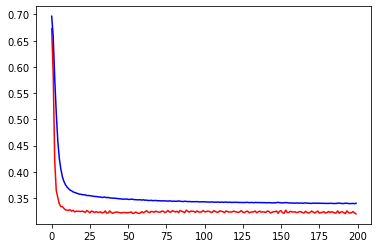

In [27]:
plt.plot(hist.history['val_loss'], 'r', hist.history['loss'], 'b')

### Save Model

In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive 
from google.colab import auth 
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()                       
drive = GoogleDrive(gauth)

In [0]:
#just to save the model. Don't run again
autoencoder.save('cae_selu.h5')
model_file = drive.CreateFile({'title' : 'cae_selu.h5'})                       
model_file.SetContentFile('cae_selu.h5')                       
model_file.Upload()

In [32]:
# Don't run again. download to google drive                       
drive.CreateFile({'id': model_file.get('id')})

GoogleDriveFile({'id': '1-uSIawIVhJCcUpFTRgQ7lXCpk9F6PlS6'})

In [68]:
#Loading models from Google Drive into Colab, Don't run

file_obj = drive.CreateFile({'id': '1-uSIawIVhJCcUpFTRgQ7lXCpk9F6PlS6'})                       
file_obj.GetContentFile('cae_selu.h5')

KeyboardInterrupt: ignored

In [0]:
from keras.models import load_model
cae_selu=load_model('/content/drive/My Drive/cae_selu.h5')

In [35]:
cae_selu.summary()

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 120, 160, 120, 1)  0         
_________________________________________________________________
encoder (Model)              (None, 2)                 1446294   
_________________________________________________________________
decoder (Model)              (None, 120, 160, 120, 1)  1493993   
Total params: 2,940,287
Trainable params: 2,940,287
Non-trainable params: 0
_________________________________________________________________


### Fixing bottleneck nodes and making classifier

### Building Encoder

In [36]:

input_img = Input(shape= (120, 160, 120 , 1))
x = Conv3D(10, (3,3,3), activation='relu', padding='same')(input_img)
x = MaxPool3D((2,2,2))(x)
x= Dropout(0.8)(x)

x = Conv3D(10, (3,3,3), activation='relu', padding='same')(x)
x = MaxPool3D((2,2,2))(x)
x= Dropout(0.8)(x)

x = Conv3D(10, (3,3,3), activation='relu', padding='same')(x)
x = MaxPool3D((2,2,2))(x)
x= Dropout(0.8)(x)

encoded_shape = K.int_shape(x)

x = Flatten()(x)

x = Dense(32, activation='selu')(x)
encoded = Dense(16, activation='selu')(x)
#encoded = Dense(2, activation='selu')(x)


encoder_b=Model(input_img, encoded, name='encoder_b')
encoder_b.summary()

Model: "encoder_b"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 120, 160, 120, 1)  0         
_________________________________________________________________
conv3d_8 (Conv3D)            (None, 120, 160, 120, 10) 280       
_________________________________________________________________
max_pooling3d_7 (MaxPooling3 (None, 60, 80, 60, 10)    0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 60, 80, 60, 10)    0         
_________________________________________________________________
conv3d_9 (Conv3D)            (None, 60, 80, 60, 10)    2710      
_________________________________________________________________
max_pooling3d_8 (MaxPooling3 (None, 30, 40, 30, 10)    0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 30, 40, 30, 10)    0 

### Building Decoder

In [37]:
encoded_input= Input(shape=(16,))
#x = Dense(16, activation='selu')(encoded_input)
x= Dense(32, activation='selu')(encoded_input)
x= Dense(np.prod(encoded_shape[1:]))(x)
x= Reshape((encoded_shape[1], encoded_shape[2], encoded_shape[3], encoded_shape[4]))(x)

x = Conv3DTranspose(10, (3,3,3), activation='relu', padding='same')(x)
x = UpSampling3D((2,2,2))(x)
x= Dropout(0.8)(x)

x = Conv3DTranspose(10, (3,3,3), activation='relu', padding='same')(x)
x = UpSampling3D((2,2,2))(x)
x= Dropout(0.8)(x)

x = Conv3DTranspose(10, (3,3,3), activation='relu', padding='same')(x)
x = UpSampling3D((2,2,2))(x)
x= Dropout(0.8)(x)

x = Conv3DTranspose(1, (3,3,3), activation='sigmoid', padding='same')(x)

decoder_b = Model(encoded_input, x, name='decoder_b')
decoder_b.summary()

Model: "decoder_b"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 16)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_16 (Dense)             (None, 45000)             1485000   
_________________________________________________________________
reshape_3 (Reshape)          (None, 15, 20, 15, 10)    0         
_________________________________________________________________
conv3d_transpose_9 (Conv3DTr (None, 15, 20, 15, 10)    2710      
_________________________________________________________________
up_sampling3d_7 (UpSampling3 (None, 30, 40, 30, 10)    0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 30, 40, 30, 10)    0 

####Building AE

In [38]:
ae_b= Model(input_img, decoder_b(encoder_b(input_img)), name='autoencoder_b')
ae_b.summary()

Model: "autoencoder_b"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 120, 160, 120, 1)  0         
_________________________________________________________________
encoder_b (Model)            (None, 16)                1446260   
_________________________________________________________________
decoder_b (Model)            (None, 120, 160, 120, 1)  1493945   
Total params: 2,940,205
Trainable params: 2,940,205
Non-trainable params: 0
_________________________________________________________________


In [39]:
ae_b.compile(optimizer='adam', loss='binary_crossentropy')

hist_b= ae_b.fit(x_train, x_train, epochs=200, verbose=1, validation_data=(x_test, x_test))

Train on 9 samples, validate on 2 samples
Epoch 1/200
9/9 [==============================] - 2s 184ms/step - loss: 0.7019 - val_loss: 0.6927
Epoch 2/200
9/9 [==============================] - 1s 117ms/step - loss: 0.6946 - val_loss: 0.6895
Epoch 3/200
9/9 [==============================] - 1s 117ms/step - loss: 0.6813 - val_loss: 0.6852
Epoch 4/200
9/9 [==============================] - 1s 117ms/step - loss: 0.6629 - val_loss: 0.6789
Epoch 5/200
9/9 [==============================] - 1s 117ms/step - loss: 0.6358 - val_loss: 0.6692
Epoch 6/200
9/9 [==============================] - 1s 118ms/step - loss: 0.6073 - val_loss: 0.6576
Epoch 7/200
9/9 [==============================] - 1s 118ms/step - loss: 0.5795 - val_loss: 0.6471
Epoch 8/200
9/9 [==============================] - 1s 118ms/step - loss: 0.5525 - val_loss: 0.6356
Epoch 9/200
9/9 [==============================] - 1s 117ms/step - loss: 0.5276 - val_loss: 0.6194
Epoch 10/200
9/9 [==============================] - 1s 118ms/step -

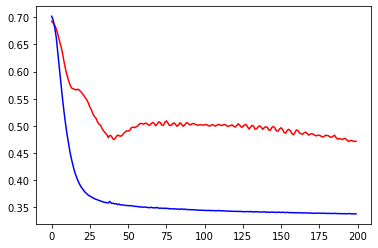

In [40]:
plt.plot(hist_b.history['val_loss'], 'r', hist_b.history['loss'], 'b')

In [0]:
#just to save the model. Don't run again
autoencoder.save('cae_16_bn.h5')
model_file = drive.CreateFile({'title' : 'cae_16_bn.h5'})                       
model_file.SetContentFile('cae_16_bn.h5')                       
model_file.Upload()

In [42]:
# Don't run again. download to google drive                       
drive.CreateFile({'id': model_file.get('id')})

GoogleDriveFile({'id': '1w3bqlhIEHmMWIUsu2Pg-oXA-n9xj5sq5'})

In [0]:
#Loading models from Google Drive into Colab, Don't run

file_obj = drive.CreateFile({'id': '1w3bqlhIEHmMWIUsu2Pg-oXA-n9xj5sq5'})                       
file_obj.GetContentFile('cae_16_bn.h5')

In [0]:
cae_16_bn=load_model('/content/drive/My Drive/cae_16_bn.h5')

In [45]:
cae_16_bn.summary()

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 120, 160, 120, 1)  0         
_________________________________________________________________
encoder (Model)              (None, 2)                 1446294   
_________________________________________________________________
decoder (Model)              (None, 120, 160, 120, 1)  1493993   
Total params: 2,940,287
Trainable params: 2,940,287
Non-trainable params: 0
_________________________________________________________________


###Building Classifier from 2 nodes bottleneck

In [28]:
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 120, 160, 120, 1)  0         
_________________________________________________________________
encoder (Model)              (None, 2)                 1446294   
_________________________________________________________________
decoder (Model)              (None, 120, 160, 120, 1)  1493993   
Total params: 2,940,287
Trainable params: 2,940,287
Non-trainable params: 0
_________________________________________________________________


In [0]:
from keras.layers import Softmax

In [0]:
encoder_c = autoencoder.layers[1]

In [31]:
encoder_c.summary()

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 120, 160, 120, 1)  0         
_________________________________________________________________
conv3d_1 (Conv3D)            (None, 120, 160, 120, 10) 280       
_________________________________________________________________
max_pooling3d_1 (MaxPooling3 (None, 60, 80, 60, 10)    0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 80, 60, 10)    0         
_________________________________________________________________
conv3d_2 (Conv3D)            (None, 60, 80, 60, 10)    2710      
_________________________________________________________________
max_pooling3d_2 (MaxPooling3 (None, 30, 40, 30, 10)    0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 30, 40, 30, 10)    0   

In [121]:
encoder_c.layers[1].get_weights()

[array([[[[[ 0.13476855, -0.10918425,  0.10076477,  0.12041579,
             0.01533026, -0.00561188, -0.08473037,  0.05226232,
             0.02974011,  0.11767384]],
 
          [[-0.12731877,  0.07873096, -0.12301442,  0.08016694,
            -0.05066879, -0.13553107, -0.1159028 , -0.02308157,
            -0.09506493,  0.02595137]],
 
          [[-0.1173927 ,  0.14667274, -0.10161826, -0.12996845,
            -0.03060105,  0.00016269, -0.08850916,  0.12313148,
             0.06616877,  0.07366093]]],
 
 
         [[[-0.12960619, -0.13386141, -0.0583159 ,  0.0645499 ,
             0.09340174,  0.08364811, -0.0086374 , -0.11358914,
            -0.04338557, -0.08713959]],
 
          [[ 0.07962169, -0.03543108,  0.00037313,  0.00409632,
             0.04483921, -0.10158419,  0.07452077,  0.06298756,
            -0.09712926,  0.05078771]],
 
          [[-0.06808984,  0.06693837, -0.07972708,  0.08788405,
            -0.06726237,  0.07127482,  0.13141814, -0.02879012,
             0.0347

###New Encoder

In [32]:
input_img = Input(shape= (120, 160, 120 , 1))
x = Conv3D(10, (3,3,3), activation='relu', padding='same')(input_img)
x = MaxPool3D((2,2,2))(x)
x= Dropout(0.8)(x)

x = Conv3D(10, (3,3,3), activation='relu', padding='same')(x)
x = MaxPool3D((2,2,2))(x)
x= Dropout(0.8)(x)

x = Conv3D(10, (3,3,3), activation='relu', padding='same')(x)
x = MaxPool3D((2,2,2))(x)
x= Dropout(0.8)(x)

encoded_shape = K.int_shape(x)

x = Flatten()(x)

x = Dense(32, activation='selu')(x)
x= Dense(16, activation='selu')(x)
new_encoded = Dense(2, activation='softmax')(x)


new_encoder=Model(input_img, new_encoded, name='new_encoder')
new_encoder.summary()

Model: "new_encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 120, 160, 120, 1)  0         
_________________________________________________________________
conv3d_4 (Conv3D)            (None, 120, 160, 120, 10) 280       
_________________________________________________________________
max_pooling3d_4 (MaxPooling3 (None, 60, 80, 60, 10)    0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 60, 80, 60, 10)    0         
_________________________________________________________________
conv3d_5 (Conv3D)            (None, 60, 80, 60, 10)    2710      
_________________________________________________________________
max_pooling3d_5 (MaxPooling3 (None, 30, 40, 30, 10)    0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 30, 40, 30, 10)    

In [33]:
encoded_input= Input(shape=(2,))
x = Softmax(2)(encoded_input)
#x = Dense(16, activation='selu')(encoded_input)
#x= Dense(32, activation='selu')(x)
#x= Dense(np.prod(encoded_shape[1:]))(x)
#x= Reshape((encoded_shape[1], encoded_shape[2], encoded_shape[3], encoded_shape[4]))(x)

#x = Conv3DTranspose(10, (3,3,3), activation='relu', padding='same')(x)
#x = UpSampling3D((2,2,2))(x)
#x= Dropout(0.8)(x)

#x = Conv3DTranspose(10, (3,3,3), activation='relu', padding='same')(x)
#x = UpSampling3D((2,2,2))(x)
#x= Dropout(0.8)(x)

#x = Conv3DTranspose(10, (3,3,3), activation='relu', padding='same')(x)
#x = UpSampling3D((2,2,2))(x)
#x= Dropout(0.8)(x)

#x = Conv3DTranspose(1, (3,3,3), activation='sigmoid', padding='same')(x)

smax = Model(encoded_input, x, name='smax')
smax.summary()

Model: "smax"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 2)                 0         
_________________________________________________________________
softmax_1 (Softmax)          (None, 2)                 0         
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


In [34]:
classifier= Model(input_img, smax(encoder_c(input_img)), name='classifier')
classifier.summary()

Model: "classifier"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 120, 160, 120, 1)  0         
_________________________________________________________________
encoder (Model)              (None, 2)                 1446294   
_________________________________________________________________
smax (Model)                 (None, 2)                 0         
Total params: 1,446,294
Trainable params: 1,446,294
Non-trainable params: 0
_________________________________________________________________


### Fitting data

In [0]:
for layer_num in range(len(new_encoder.layers)-1):
  new_encoder.layers[layer_num].set_weights(encoder_c.layers[layer_num].get_weights())

Should we freeze them? Or just initial value?

In [0]:
#didn't freeze
new_encoder.compile(optimizer='adam', loss='binary_crossentropy')

In [37]:
new_encoder.summary()

Model: "new_encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 120, 160, 120, 1)  0         
_________________________________________________________________
conv3d_4 (Conv3D)            (None, 120, 160, 120, 10) 280       
_________________________________________________________________
max_pooling3d_4 (MaxPooling3 (None, 60, 80, 60, 10)    0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 60, 80, 60, 10)    0         
_________________________________________________________________
conv3d_5 (Conv3D)            (None, 60, 80, 60, 10)    2710      
_________________________________________________________________
max_pooling3d_5 (MaxPooling3 (None, 30, 40, 30, 10)    0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 30, 40, 30, 10)    

In [39]:
new_encoder.predict(x_test)

array([[2.4474003e-09, 1.0000000e+00],
       [8.7795353e-09, 1.0000000e+00]], dtype=float32)

In [41]:
new_encoder.predict(x_train)

array([[9.2797965e-09, 1.0000000e+00],
       [7.3095707e-09, 1.0000000e+00],
       [1.4675016e-09, 1.0000000e+00],
       [2.6136755e-09, 1.0000000e+00],
       [1.4367176e-09, 1.0000000e+00],
       [3.2547344e-08, 1.0000000e+00],
       [1.5889107e-08, 1.0000000e+00],
       [4.2913171e-09, 1.0000000e+00],
       [3.9997410e-09, 1.0000000e+00]], dtype=float32)

In [40]:
y_test

array([[1., 0.],
       [1., 0.]], dtype=float32)

In [38]:
new_history= new_encoder.fit(x_train, y_train, batch_size=3, epochs=200, verbose=1, validation_data=(x_test, y_test))

Train on 9 samples, validate on 2 samples
Epoch 1/200
9/9 [==============================] - 1s 107ms/step - loss: 3.4176 - val_loss: 15.3371
Epoch 2/200
9/9 [==============================] - 1s 77ms/step - loss: 3.4176 - val_loss: 15.3371
Epoch 3/200
9/9 [==============================] - 1s 77ms/step - loss: 3.4176 - val_loss: 15.3371
Epoch 4/200
9/9 [==============================] - 1s 77ms/step - loss: 3.4176 - val_loss: 15.3371
Epoch 5/200
9/9 [==============================] - 1s 77ms/step - loss: 3.4176 - val_loss: 15.3371
Epoch 6/200
9/9 [==============================] - 1s 77ms/step - loss: 3.4176 - val_loss: 15.3371
Epoch 7/200
9/9 [==============================] - 1s 77ms/step - loss: 3.4176 - val_loss: 15.3371
Epoch 8/200
9/9 [==============================] - 1s 78ms/step - loss: 3.4176 - val_loss: 15.3371
Epoch 9/200
9/9 [==============================] - 1s 78ms/step - loss: 3.4176 - val_loss: 15.3371
Epoch 10/200
9/9 [==============================] - 1s 77ms/step -

KeyboardInterrupt: ignored

###Freezed weights